In [ ]:
#----------------------------------------------#
#
# Project 1
# Data Analysis on Dataset of Novel Corona Virus 
#
#----------------------------------------------#
#
# Created by: Pratiksha Raval (praval@scu.edu)
#
#----------------------------------------------#
#
# link to the dataset: 'https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset'
#
#----------------------------------------------#

# Project 1

# Introduction

<b> What is coronavirus? </b>

2019 Novel Coronavirus (2019-nCoV) is a virus (more specifically, a coronavirus) identified as the cause of an outbreak of respiratory illness first detected in Wuhan, China. Early on, many of the patients in the outbreak in Wuhan, China reportedly had some link to a large seafood and animal market, suggesting animal-to-person spread. However, a growing number of patients reportedly have not had exposure to animal markets, indicating person-to-person spread is occurring. At this time, it’s unclear how easily or sustainably this virus is spreading between people.
    
<b> Note: </b> <i>This dataset has daily level information on the number of affected cases, deaths and recovery from 2019 novel coronavirus. Please note that this dataset includes analysis till the date <b>February 9, 2020.</b> The dataset was available from January 22, 2020. </i>

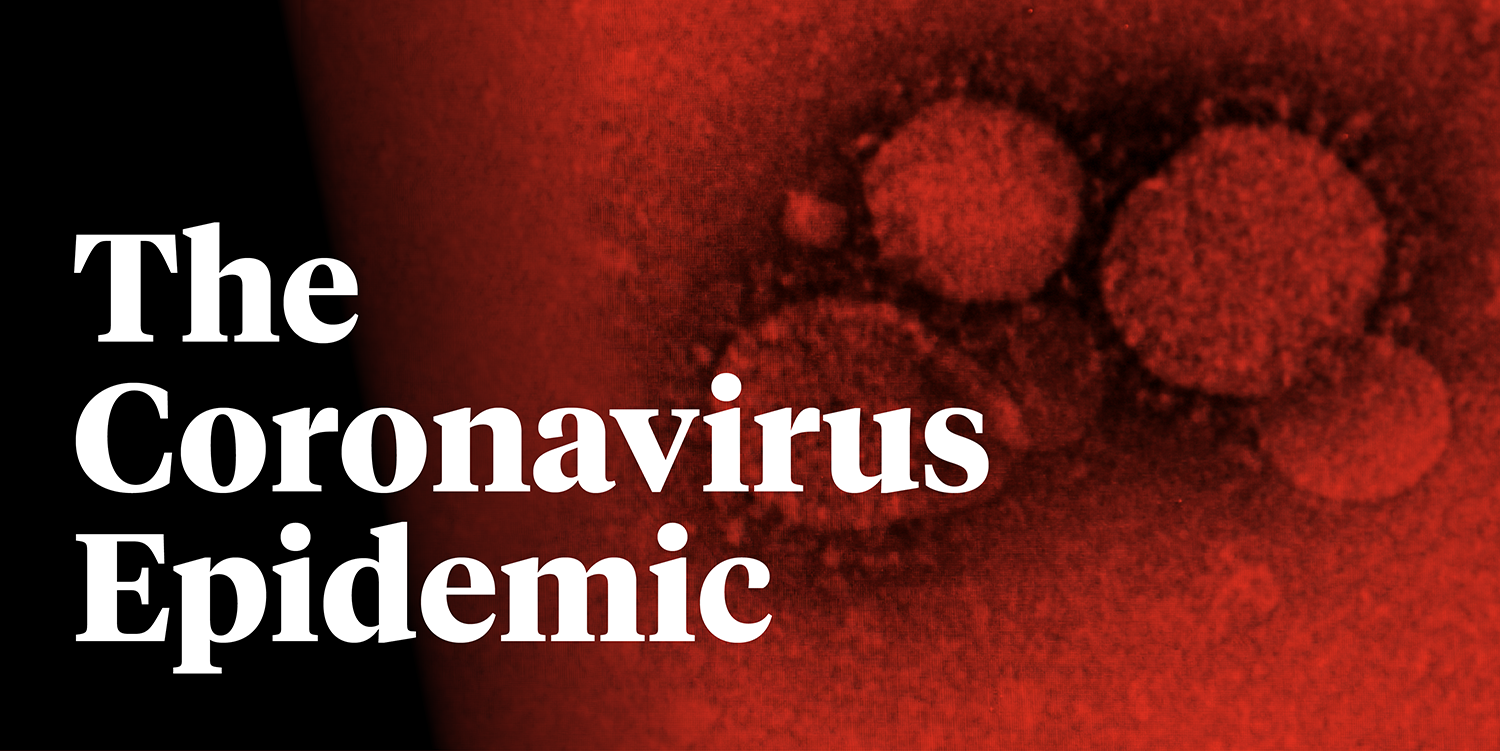

In [1]:
'''Import basic modules.'''
import pandas as pd
import numpy as np

'''Visualization using Seaborn and Matplotlib'''
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

'''Reading the dataset'''
data = pd.read_csv('2019_nCoV_data.csv')
data.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0


In [2]:
'''Data Cleaning'''
#Pandas to_datetime() method to convert string Date time into Python Date time object
data['Last Update'] = data['Last Update'].apply(pd.to_datetime)
data['Date'] = data['Date'].apply(pd.to_datetime)
data.drop(['Sno'], axis=1, inplace = True)
data.rename(columns={'Province/State':'City_State'}, inplace=True)
data.head()

,Date,City_State,Country,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22 12:00:00,Anhui,China,2020-01-22 12:00:00,1.0,0.0,0.0
1,2020-01-22 12:00:00,Beijing,China,2020-01-22 12:00:00,14.0,0.0,0.0
2,2020-01-22 12:00:00,Chongqing,China,2020-01-22 12:00:00,6.0,0.0,0.0
3,2020-01-22 12:00:00,Fujian,China,2020-01-22 12:00:00,1.0,0.0,0.0
4,2020-01-22 12:00:00,Gansu,China,2020-01-22 12:00:00,0.0,0.0,0.0


# Coronavirus' Global Spread

In [3]:
'''As of Date February 9, 2020'''
from datetime import date
#converting string object into date object
data_9_feb = data[data['Date'] > pd.Timestamp(date(2020, 2, 9))]
data_9_feb.head()

,Date,City_State,Country,Last Update,Confirmed,Deaths,Recovered
1055,2020-02-09 23:20:00,Hubei,Mainland China,2020-02-09 23:33:02,29631.0,871.0,1795.0
1056,2020-02-09 23:20:00,Guangdong,Mainland China,2020-02-10 03:43:20,1151.0,1.0,147.0
1057,2020-02-09 23:20:00,Zhejiang,Mainland China,2020-02-10 01:13:06,1092.0,0.0,201.0
1058,2020-02-09 23:20:00,Henan,Mainland China,2020-02-10 01:13:06,1073.0,6.0,169.0
1059,2020-02-09 23:20:00,Hunan,Mainland China,2020-02-10 02:13:16,879.0,1.0,186.0


## Global Scenario: Present condition for total confirmed, death and recovered cases

In [4]:
data_9_feb[['Confirmed', 'Deaths', 'Recovered']].sum()

Confirmed    40536.0
Deaths         910.0
Recovered     3312.0
dtype: float64

## Situation in USA

In [5]:
us_9_feb = data_9_feb[data_9_feb['Country'] == 'US'][["City_State", "Confirmed", "Deaths", "Recovered"]]
us_9_feb

,City_State,Confirmed,Deaths,Recovered
1110,"Chicago, IL",2.0,0.0,2.0
1111,"San Benito, CA",2.0,0.0,0.0
1112,"Santa Clara, CA",2.0,0.0,0.0
1121,"Boston, MA",1.0,0.0,0.0
1122,"Los Angeles, CA",1.0,0.0,0.0
1123,"Madison, WI",1.0,0.0,0.0
1124,"Orange, CA",1.0,0.0,0.0
1125,"Seattle, WA",1.0,0.0,1.0
1126,"Tempe, AZ",1.0,0.0,0.0


Whoa!!! Most Confirmed cases are in California with 2 in Santa Clara! That's scary.
<br/><br/>

# Country wise total number of cases

In [6]:
'''Creating a dataframe with total no of confirmed cases for every country'''
total = data_9_feb.groupby('Country')['Confirmed','Deaths','Recovered'].sum()
total

,Confirmed,Deaths,Recovered
Country,,,
Australia,15.0,0.0,2.0
Belgium,1.0,0.0,0.0
Cambodia,1.0,0.0,0.0
Canada,7.0,0.0,0.0
Finland,1.0,0.0,0.0
France,11.0,0.0,0.0
Germany,14.0,0.0,0.0
Hong Kong,36.0,1.0,0.0
India,3.0,0.0,0.0


### It's Mainland China vs rest of the world! 

# Let's look at only Mainland China

In [7]:
'''Creating a dataframe for number of Confirmed, Deaths nd Recovered cases only for the Country Mainland China'''
china_9_feb = data_9_feb[data_9_feb['Country'] == 'Mainland China'][["City_State", "Confirmed", "Deaths", "Recovered"]]
china_9_feb

,City_State,Confirmed,Deaths,Recovered
1055,Hubei,29631.0,871.0,1795.0
1056,Guangdong,1151.0,1.0,147.0
1057,Zhejiang,1092.0,0.0,201.0
1058,Henan,1073.0,6.0,169.0
1059,Hunan,879.0,1.0,186.0
1060,Anhui,830.0,3.0,73.0
1061,Jiangxi,771.0,1.0,102.0
1062,Jiangsu,492.0,0.0,72.0
1063,Chongqing,468.0,2.0,51.0
1064,Shandong,459.0,1.0,63.0


### Spread of the Virus in Top 10 states in China

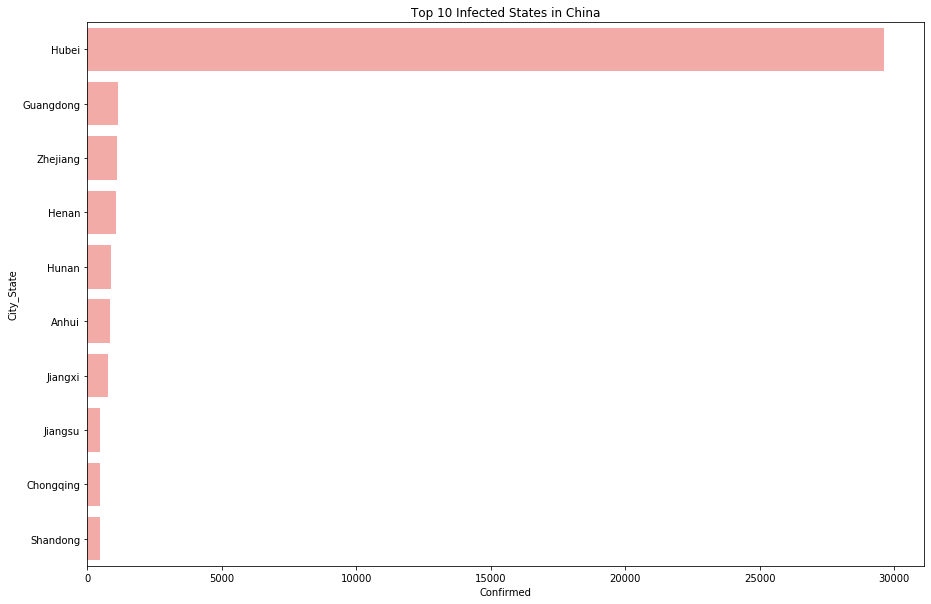

In [8]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set(title='Top 10 Infected States in China')
sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="City_State", data=china_9_feb.head(10),
            label="Confirmed", color="r")
plt.show()

Wuhan City, Hubei Province, China has the highest number of detected cases while the other states have comparatively less number of confirmed cases! 

## Let's look at the Confirmed vs Recovered figures of Provinces of China other than Hubei

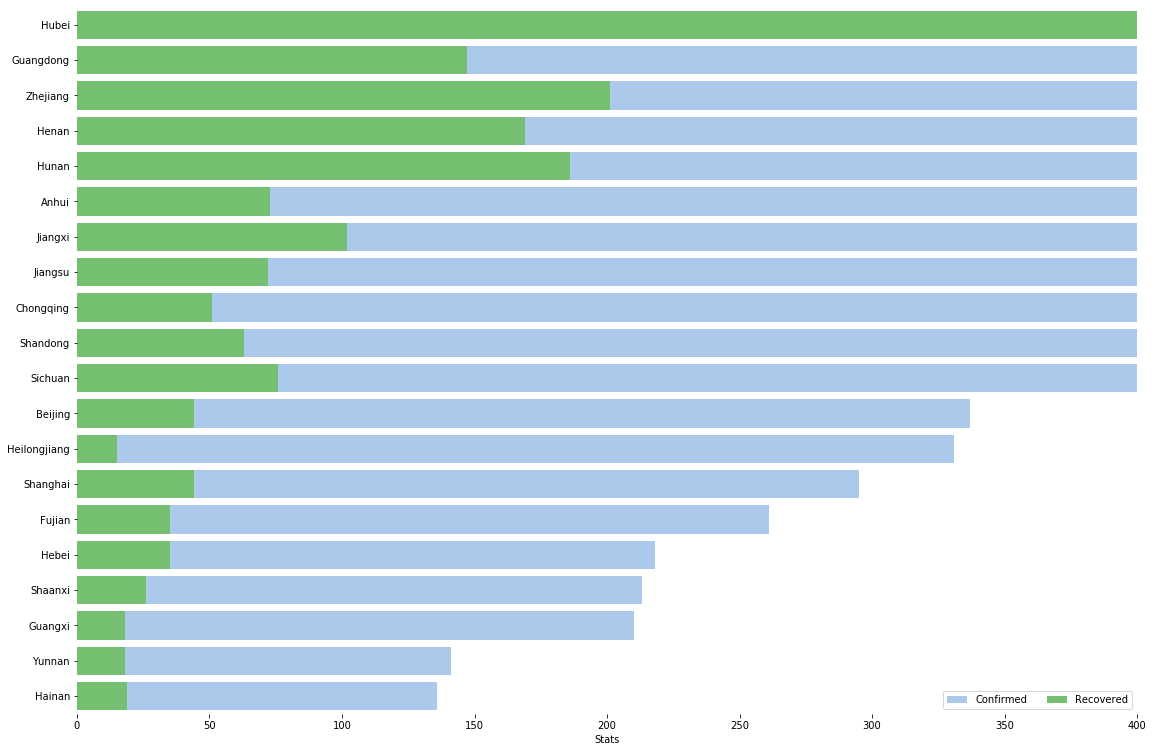

In [9]:
#Let's look at the Confirmed vs Recovered figures of Provinces of China other than Hubei
f, ax = plt.subplots(figsize=(19, 13))

sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="City_State", data=china_9_feb.head(20),
            label="Confirmed", color="b")

sns.set_color_codes("muted")
sns.barplot(x="Recovered", y="City_State", data=china_9_feb.head(20),
            label="Recovered", color="g")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 400), ylabel="",
       xlabel="Stats")
sns.despine(left=True, bottom=True)

## Overall picture using multivariant bar chart

[]

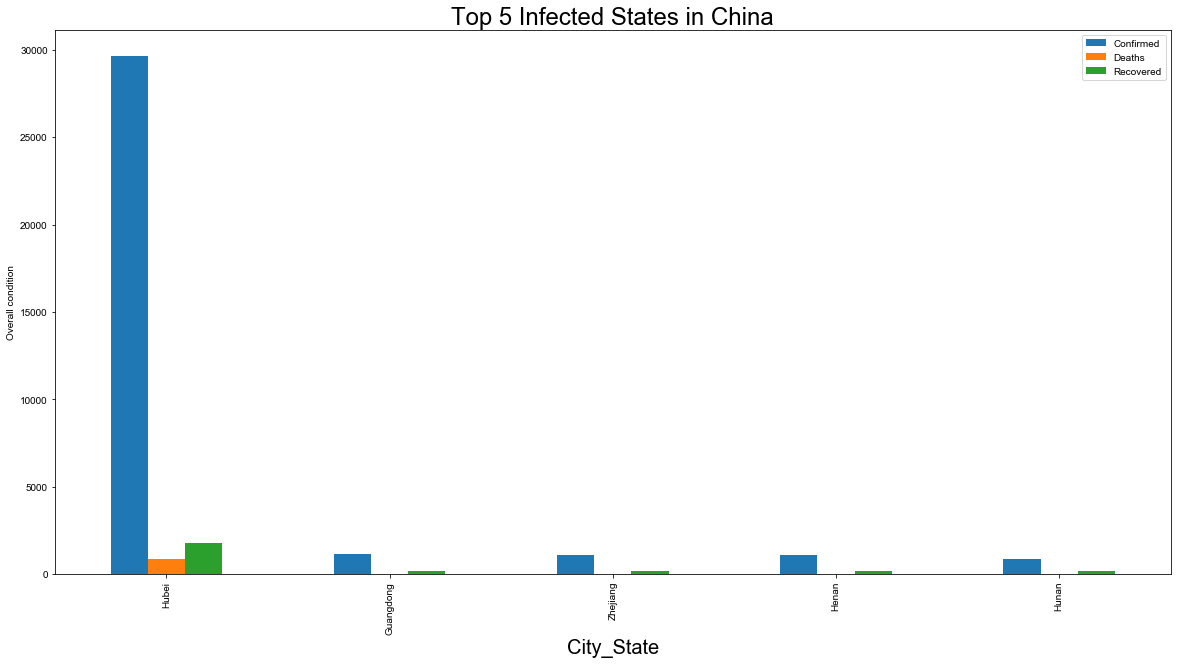

In [10]:
'''plotting confirmed, deaths and recovered cases together for top 5 affected states in China'''
dx = china_9_feb.head(5)
ax = dx.plot(x = 'City_State', y=['Confirmed','Deaths','Recovered'], kind="bar", figsize=(20, 10))
sns.set(font_scale=2)
plt.xlabel('City_State', fontsize=20)
plt.ylabel('Overall condition')
plt.title('Top 5 Infected States in China')
plt.plot()

# Let's look at the Ratios

In [11]:
'''Percentage of death cases in China'''
deathpercent = (china_9_feb['Deaths'].sum() / china_9_feb['Confirmed'].sum()) * 100
deathpercent

2.2609561752988045

In [12]:
'''Percentage of Recovered cases in China'''
recoverypercent = (china_9_feb['Recovered'].sum() / china_9_feb['Confirmed'].sum()) * 100
recoverypercent

8.18227091633466

Of all the confirmed cases, patients are dying at the rate of ~2% and the updated cases for the recovering patiets are growing at the rate of 8%. That's a relief that there is a recovery.
<br/><br/>

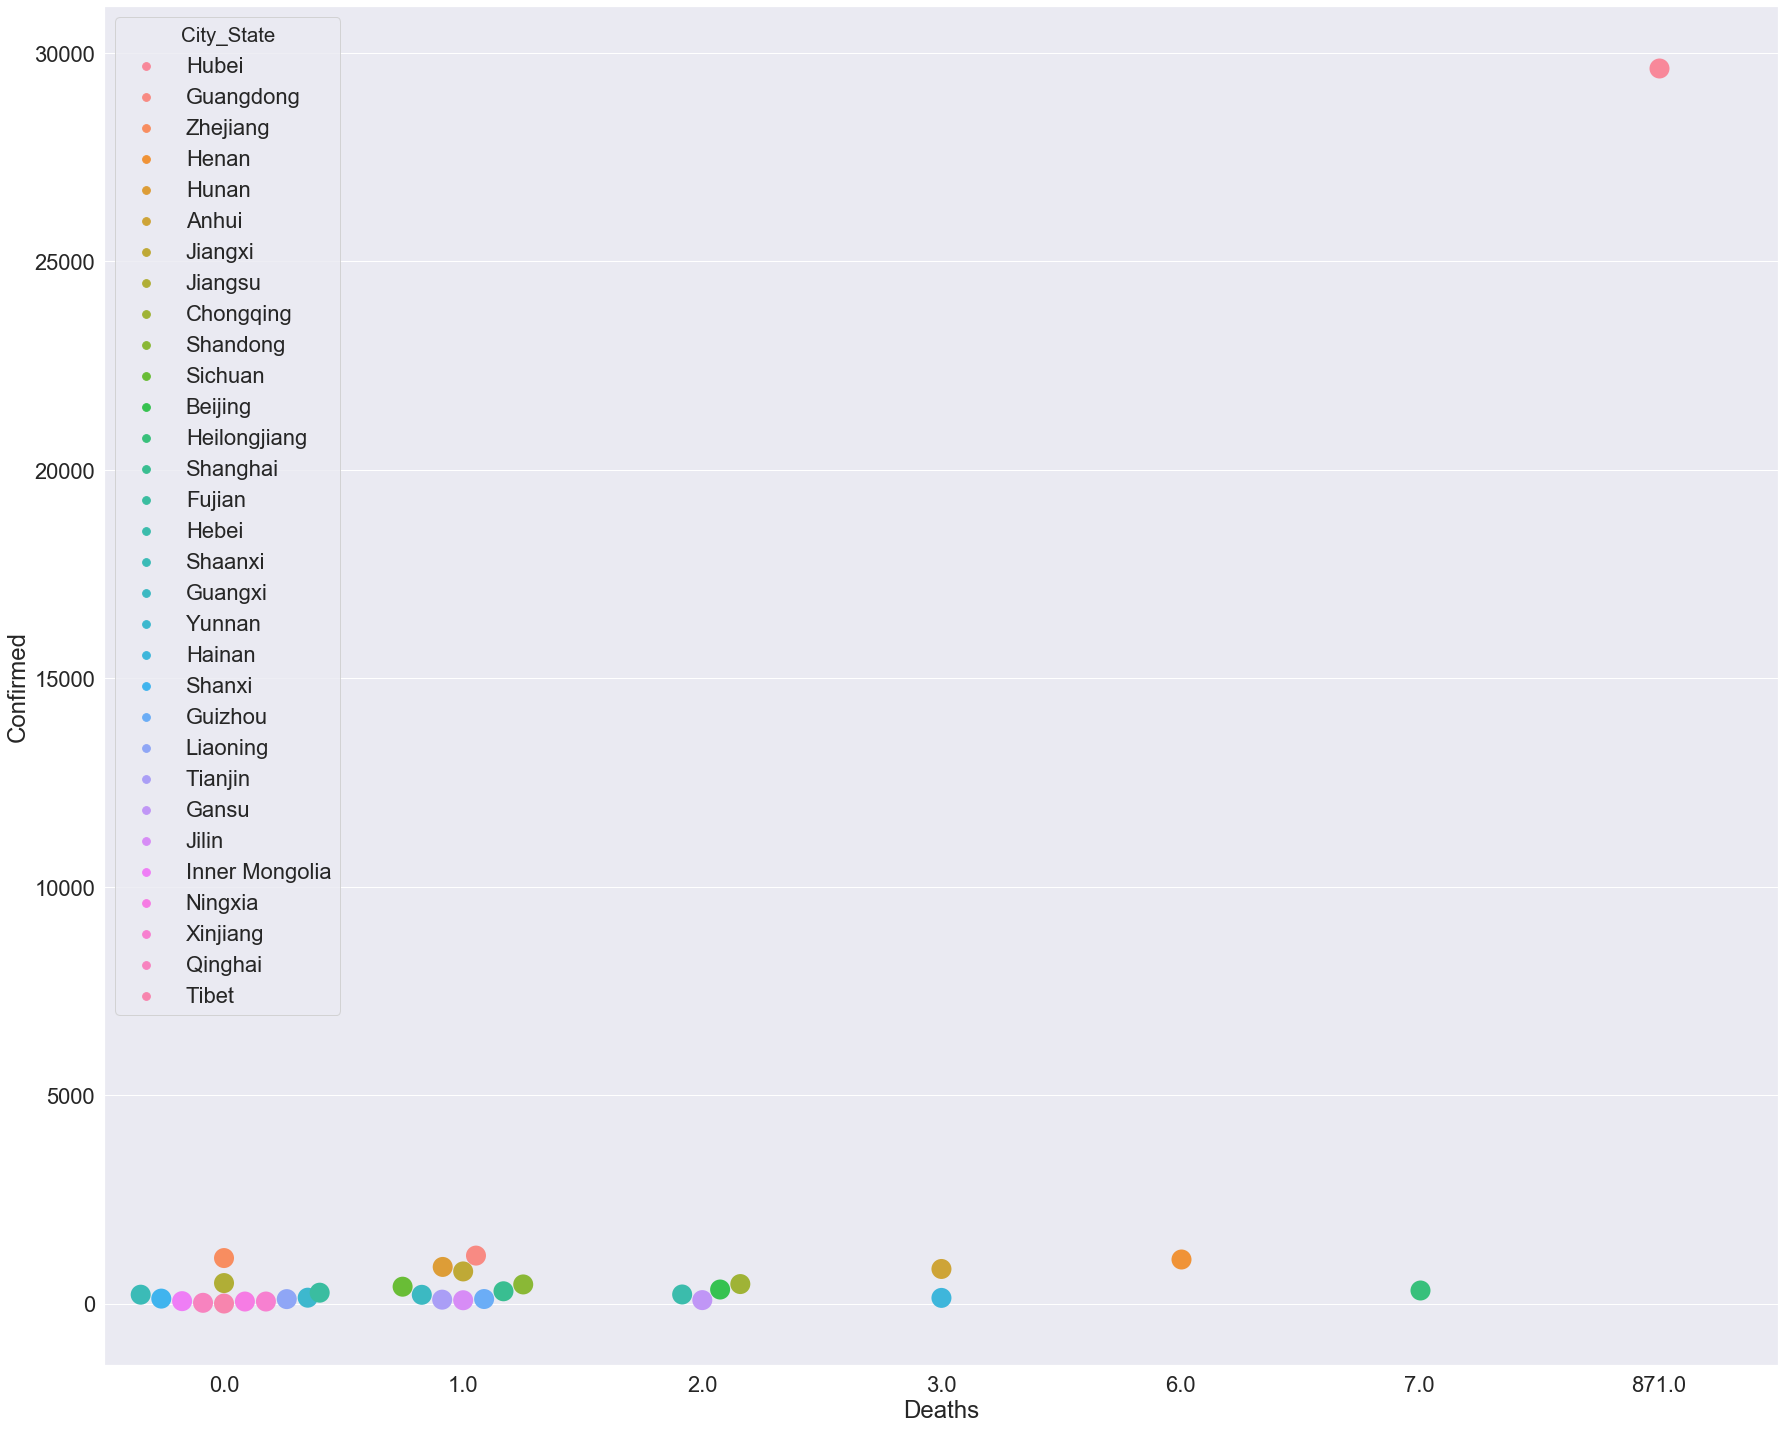

In [13]:
'''number of deaths happening to the total number of confirmed cases in china'''
plt.figure(figsize=(30,25))
# Swarmplot with melted_df
sns.swarmplot(x='Deaths', y='Confirmed', data=china_9_feb, 
              hue='City_State', size=20)

To conclude, there's been an increasing number of reports daily all over the world by the havoc caused by the coronavirus outbreak.

<b>Gobal Condition</b>
Till now 40,536 globally confirmed cases with 910 deaths.
<b>China Condition</b>
40,160 Confirmed cases in Mainland China with 908 deaths and 3286 recovered.
<b>Wuhan City</b>
29,631 Confirmed cases including 871 deaths and 1,795 recovered.

## Stay Safe!